<a href="https://colab.research.google.com/github/karlamendes0/-Processamento-de-Linguagem-Natural-em-tweets-de-desastres/blob/main/Processamento_de_Linguagem_Natural_em_tweets_de_desastres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento de Linguagem Natural

Os dados utilizados neste kernel fazem parte da competição do kaggle
Para mais detalhes, acesse: Kaggle's Competition
Neste kernel, traremos diversos metodos de processamento de linguagem natural para classificar tweets de desastres, se são falsos ou verídicos.


In [ ]:
# Lib para o carregamento dos dados CSV
!pip install pandas
import pandas as pd

# Lendo os dados de treinamento na pasta input


In [ ]:
dataframe = pd.read_csv('/content/train.csv',
                 index_col='id')
dataframe.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#Pre-processamento
A partir de agora realizaremos o preprocessamento dos dados, procurando saber quais as caracteristicas mais relevantes para um posterior treinamento do modelo


In [ ]:
# Buscando informações da base de dados
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


Percebe-se que somente os dados TEXT, que é o conteúdo a ser analisado e TARGET, que é o rótulo do conteúdo, estão completos.
Ou seja, suas colunas não possuem valores nulos
Primeiramente vamos trabalhar com essas duas colunas

In [ ]:
# Para não se perder os dados originais, atribuimos os processamentos desses dados em novas variáveis
# Aqui, selecionaremos as colunas de TEXT e TARGET
processed_df = dataframe.iloc[:,2:4]
processed_df.head()

,text,target
id,,
1,Our Deeds are the Reason of this #earthquake M...,1
4,Forest fire near La Ronge Sask. Canada,1
5,All residents asked to 'shelter in place' are ...,1
6,"13,000 people receive #wildfires evacuation or...",1
7,Just got sent this photo from Ruby #Alaska as ...,1


Apenas olhando o dataset, percebemos que ele possui uma série de caracteres especiais, primeiramente faremos uma limpeza desses caracteres especiais

In [ ]:
# O NLTK ou Natural Language Tool Kit, é um biblioteca própria para trabalhar com processamento de linguagem natural
# Aqui utilizaremos um de seus metodos de tokenização, sendo este específico para o tratamento de pontuações e caracteres especiais
from nltk.tokenize import WordPunctTokenizer

# A biblioteca string é nativa do python e é responsável pela manipulação de string
from string import punctuation

token_pontuacao = WordPunctTokenizer()

# Aqui buscaremos todos as pontuações do subpacote da lib string e alocaremos em uma lista
pontuacao = []

for ponto in punctuation:
    pontuacao.append(ponto)

In [ ]:
# Vamos verificar aqui os caracteres a serem removidos

print(pontuacao)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
# Esta função é responsável por realizar a limpeza do dataset, sempre que for necessario, pode-se chamar ela
# Nela passaremos os dados, o token que será utilizado para preprocessamento, a coluna a ser processada,
# o nome da coluna com o resultado do preprocessamento e a lista de caracteres os palavras as serem removidas

def preprocessamento(dataframe, token, coluna, nome_col_processada, stopwords):
    frase_processada = []
    for opiniao in dataframe[coluna]:
        nova_frase = []
        opiniao = opiniao.lower()
        palavras_texto = token.tokenize(opiniao)
        for palavra in palavras_texto:
            if palavra not in stopwords:
                nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))

    dataframe[nome_col_processada] = frase_processada
    return dataframe

In [ ]:
# Agora vamos para a segunda parte de preprocessamento, remover os caracteres especiais

processed_df = preprocessamento(processed_df, token_pontuacao, "text", "preprocessed_text_1", pontuacao)

In [ ]:

processed_df.head()

,text,target,preprocessed_text_1
id,,,
1,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
5,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
6,"13,000 people receive #wildfires evacuation or...",1,13 000 people receive wildfires evacuation ord...
7,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


Comparado ao texto anterior, já percebemos que houve uma limpeza dos caracteres especiais em nossos dados
Mas lembre-se, existem palavras que não agregam sentido semantico ao conteudo do texto, por exemplo
Pronomes, preprosições e etc... Elas são conhecidas como stopwords
Nosso objetivo agora é identificar as palavras mais frequentes e buscar essas stopwords dentre elas

In [ ]:
# Vamos buscar todas as palavras no dataset em que houve o ultimo preprocessamento

words = ' '.join([texto for texto in processed_df["preprocessed_text_1"]])

Acima percebe-se que apesar dos esforços anteriores, ainda existem caracteres especiais permeando o dataset

Assim que terminamos este ultimo preprocessamento, realizaremos uma nova busca por esses caracteres

In [ ]:
import nltk
# WhitespaceTokenizer, tem como objetivos separar as frases baseada nos espaços entre as palavras
from nltk.tokenize import WhitespaceTokenizer
# Funcao para plotar o grafico de frequencia de palavras no dataset de forma decrescente

# O matplotlib e o seaborn são bibliotecas responsaveis pela visualização dos dados a serem tratados

import matplotlib.pyplot as plt
import seaborn as sns
def pareto(texto, coluna_texto, quantidade):
    palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                  "Frequencia": list(frequencia.values())})

    df_frequencia = df_frequencia.nlargest(columns="Frequencia", n=quantidade)
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Palavra", y="Frequencia", data=df_frequencia)
    plt.xlabel(xlabel = "Palavras")
    plt.ylabel(ylabel = "Contagem")

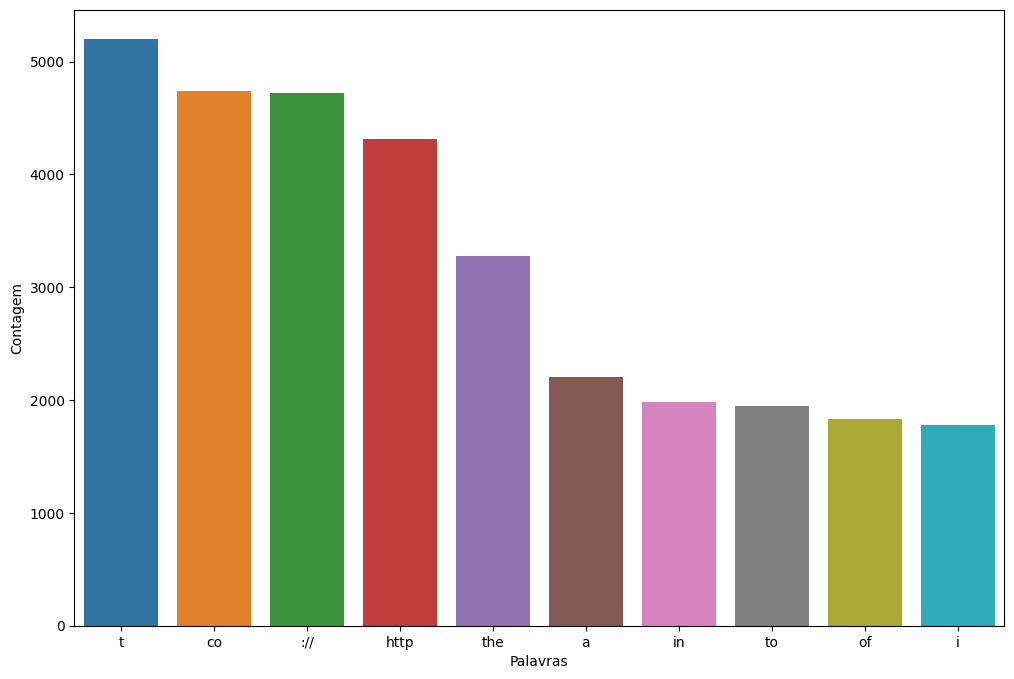

In [ ]:
# Plotando a frequencia das palavras

pareto(processed_df, "preprocessed_text_1", 10)

Pelo grafico plotado acima, percebe-se que ainda possuem caracteres especiais que serão excluídos posteriormente
Agora trataremos das palavras mais frequentes

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# O NLTK oferece um dicionario com stopwords em varias linguas, como o dataset está em inglês
# Chamaremos o dicionario com vacabulario em ingles

stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
# Vamos visualizar essas stopwords

print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Agora vamos remover essas stopwords utilizando a função "preprocessamento"

token_espaco = WhitespaceTokenizer()
processed_df = preprocessamento(processed_df, token_espaco, "text", "preprocessed_text_2", stopwords)

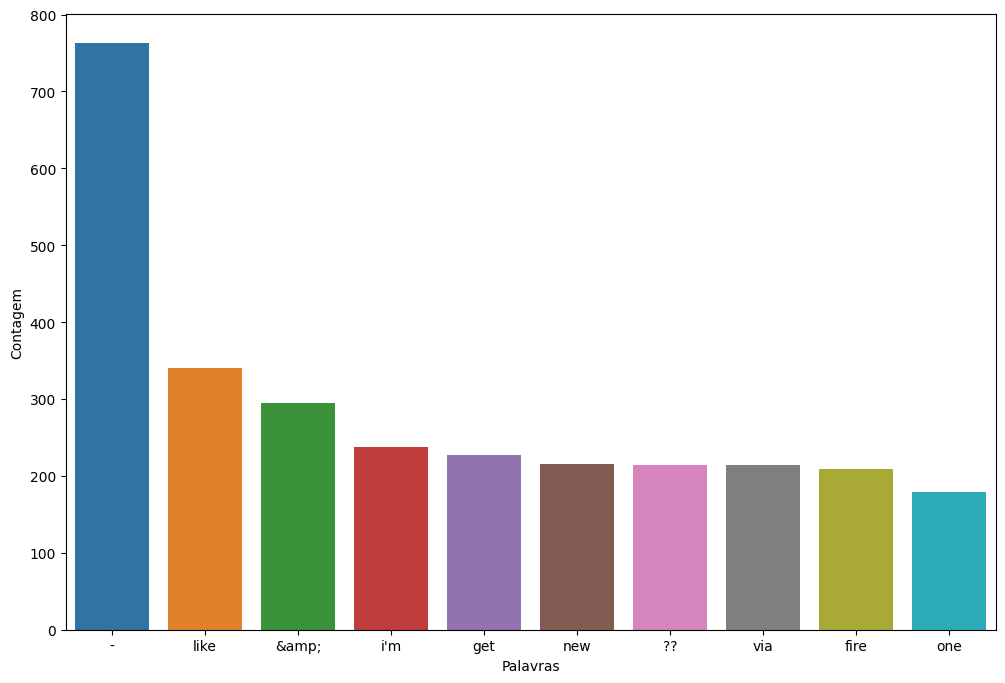

In [ ]:
pareto(processed_df, "preprocessed_text_2", 10)

In [ ]:
# Função para plotar uma nuvem de palavras
# Uma nuvem de palavras é uma imagem em que as palavras mais frequentes são mais evidenciadas

# Primeiramente importaremos a biblioteca WordCloud e ela será a responsável pela plotagem da nossa nuvem de palavras
from wordcloud import WordCloud

def nuvem_de_palavras(dataframe, coluna_texto, classificacao):
    dados = dataframe.query(f"target == '{classificacao}'")
    palavras = ' '.join([texto for texto in dados[coluna_texto]])
    nuvem_palavras = WordCloud(width=800,
                               height=500,
                               max_font_size=110,
                               collocations=False,
                               background_color='white').generate(palavras)

    plt.figure(figsize=(15, 10))
    plt.imshow(nuvem_palavras, interpolation='bessel')
    plt.axis("off")
    plt.show()

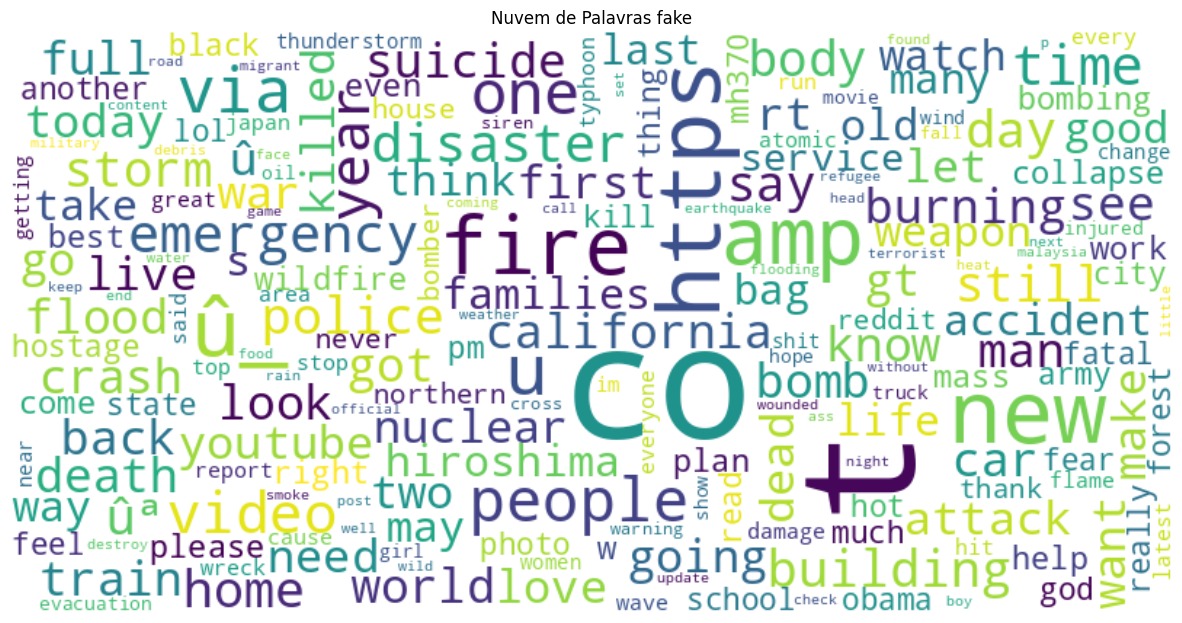

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def nuvem_de_palavras(dataframe, coluna_texto, classificacao):
    # Verificar se a coluna existe no DataFrame
    if coluna_texto in dataframe.columns:
        # Filtrar linhas que contêm texto não vazio
        linhas_com_texto = dataframe[dataframe[coluna_texto].notnull()]

        # Verificar se há linhas com texto não vazio
        if not linhas_com_texto.empty:
            # Juntar todas as palavras da coluna de texto
            palavras = ' '.join(linhas_com_texto[coluna_texto])

            # Gerar a nuvem de palavras
            wordcloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='white').generate(palavras)

            # Plotar a nuvem de palavras
            plt.figure(figsize=(15, 10))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(classificacao)
            plt.show()
        else:
            print(f"A coluna '{coluna_texto}' não contém texto não vazio.")
    else:
        print(f"A coluna '{coluna_texto}' não existe no DataFrame.")

# Chamar a função nuvem_de_palavras
nuvem_de_palavras(processed_df, "preprocessed_text_2", "Nuvem de Palavras fake")


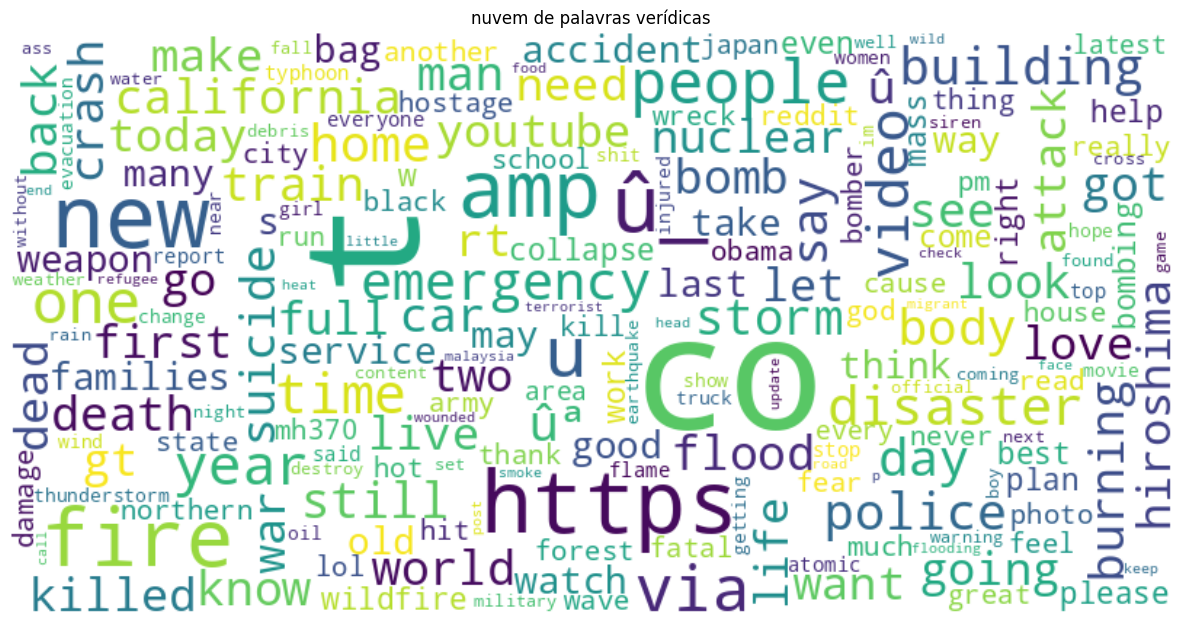

In [ ]:
# Plotando a nuvem de dados verídica

nuvem_de_palavras(processed_df, "preprocessed_text_2", "nuvem de palavras verídicas")

#classificação

Agora que fizemos os preprocessamentos, vamos começar o processo de classificação utilizando modelos de machine learning

Os métodos a serem utilizados serão:

- Regressão Logistica
- Arvores de Decisão
- Classificação Bayesiana
- Máquinas de vetores de suporte

Antes de começarmos a trabalhar com os modelos de Machine Learning, temos que transformar esses dados que estão em formato de string para um formato numerico


Para isso utilizaremos o TF-IDF -> term frequency–inverse document frequency

Segundo o wikipedia: é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico.

In [23]:
# O scikit-learn possui como um de seus metodos o TfidfVectorizer, sendo este a realizar a transformação dos nossos dados

from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
import numpy as np

In [25]:
X = TfidfVectorizer().fit_transform(processed_df["preprocessed_text_2"])
y = np.asarray(processed_df["target"])

In [26]:
# Como boa pratica realizaremos a separação dos dados para validação dos modelos a serem testados
# Aqui realizaremos uma separação de

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y)

In [34]:
# Importando os modelos de ML para a classificação do texto
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras.layers import Dense, LSTM, GRU
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#Regressao Logistica (Logistic Regression Model)

Regressão Logistica




Acurácia: 78.99159663865547%






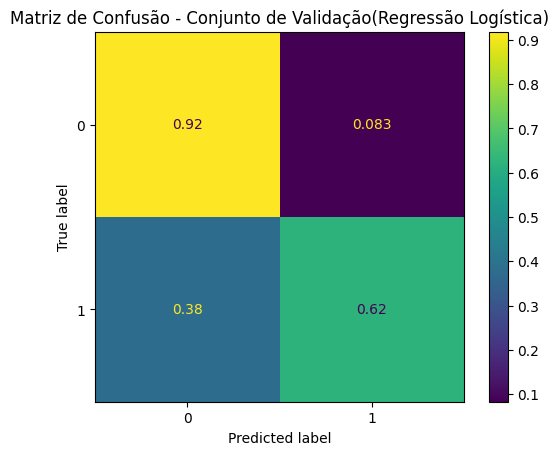

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1086
           1       0.85      0.62      0.72       818

    accuracy                           0.79      1904
   macro avg       0.81      0.77      0.78      1904
weighted avg       0.80      0.79      0.78      1904



In [48]:
linear_model_classifier = LogisticRegression()
linear_model_classifier.fit(X_train, y_train)
acc = linear_model_classifier.score(X_val, y_val)
print("Regressão Logistica\n\n")
print("====================================\n\n")
print(f"Acurácia: {acc*100}%\n\n")
print("====================================\n\n")

# Fazendo previsões no conjunto de validação
y_pred_val = linear_model_classifier.predict(X_val)

# Calculando a matriz de confusão
cm_val = confusion_matrix(y_val, y_pred_val, normalize="true")

# Exibindo a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=np.unique(y_val))
disp.plot()
plt.title('Matriz de Confusão - Conjunto de Validação(Regressão Logística)')
plt.show()

#relatorio de classificacao

# Treinando o modelo
linear_model_classifier = LogisticRegression()
linear_model_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de validação
y_pred_val = linear_model_classifier.predict(X_val)

# Obtendo o relatório de classificação
class_report = classification_report(y_val, y_pred_val)

# Exibindo o relatório de classificação
print("Relatório de Classificação:")
print(class_report)


#extraindo as metricas individuais


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculando métricas individualmente
precision = precision_score(y_val, y_pred_val, average='binary')  # ou 'micro', 'macro', 'weighted', 'samples'
recall = recall_score(y_val, y_pred_val, average='binary')
f1 = f1_score(y_val, y_pred_val, average='binary')
accuracy = accuracy_score(y_val, y_pred_val)

# Exibindo as métricas individualmente
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Acurácia: {accuracy:.2f}")


Precisão: 0.85
Recall: 0.62
F1-Score: 0.72
Acurácia: 0.79


#Arvore de Decisão


Arvore de Decisão




Acurácia: 75.84033613445378%






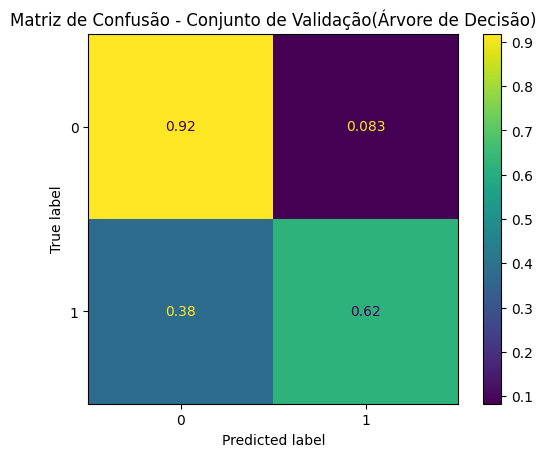

Relatório de Classificação - Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1086
           1       0.74      0.65      0.69       818

    accuracy                           0.75      1904
   macro avg       0.75      0.74      0.74      1904
weighted avg       0.75      0.75      0.75      1904



In [50]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
acc = decision_tree_classifier.score(X_val, y_val)
print("Arvore de Decisão\n\n")
print("====================================\n\n")
print(f"Acurácia: {acc*100}%\n\n")
print("====================================\n\n")

# Fazendo previsões no conjunto de validação
y_pred_val = linear_model_classifier.predict(X_val)

# Calculando a matriz de confusão
cm_val = confusion_matrix(y_val, y_pred_val, normalize="true")

# Exibindo a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=np.unique(y_val))
disp.plot()
plt.title('Matriz de Confusão - Conjunto de Validação(Árvore de Decisão)')
plt.show()


# Treinando o modelo
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de validação
y_pred_val = decision_tree_classifier.predict(X_val)

# Obtendo o relatório de classificação
class_report_tree = classification_report(y_val, y_pred_val)

# Exibindo o relatório de classificação para a Árvore de Decisão
print("Relatório de Classificação - Árvore de Decisão:")
print(class_report_tree)

#Classificação Bayesiana


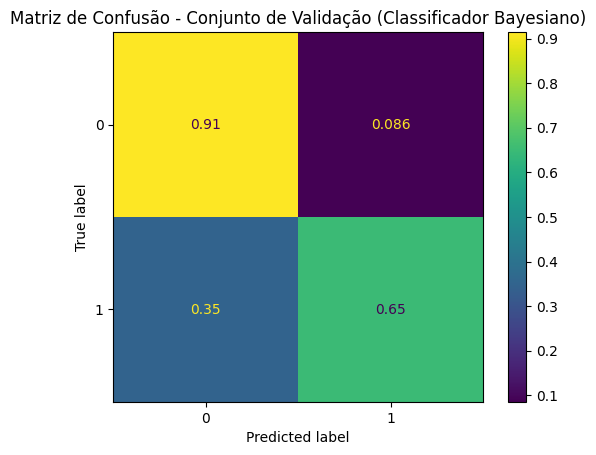

Relatório de Classificação - Classificador Bayesiano:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1086
           1       0.85      0.65      0.74       818

    accuracy                           0.80      1904
   macro avg       0.81      0.78      0.79      1904
weighted avg       0.81      0.80      0.80      1904

Acurácia - Classificador Bayesiano: 80.0420168067227


In [51]:
from sklearn.naive_bayes import MultinomialNB

# Treinando o modelo
bayesian_classifier = MultinomialNB()
bayesian_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de validação
y_pred_val_bayesian = bayesian_classifier.predict(X_val)

# Calculando a matriz de confusão
cm_val_bayesian = confusion_matrix(y_val, y_pred_val_bayesian, normalize="true")

# Exibindo a matriz de confusão
disp_bayesian = ConfusionMatrixDisplay(confusion_matrix=cm_val_bayesian, display_labels=np.unique(y_val))
disp_bayesian.plot()
plt.title('Matriz de Confusão - Conjunto de Validação (Classificador Bayesiano)')
plt.show()

# Obtendo o relatório de classificação
class_report_bayesian = classification_report(y_val, y_pred_val_bayesian)

# Exibindo o relatório de classificação para o classificador bayesiano
print("Relatório de Classificação - Classificador Bayesiano:")
print(class_report_bayesian)

from sklearn.metrics import accuracy_score

# Calcular a acurácia
accuracy_bayesian = accuracy_score(y_val, y_pred_val_bayesian)

# Exibir a acurácia
print("Acurácia - Classificador Bayesiano:", accuracy_bayesian*100)



#LinearSVC Model (Máquinas de vetores de suporte_


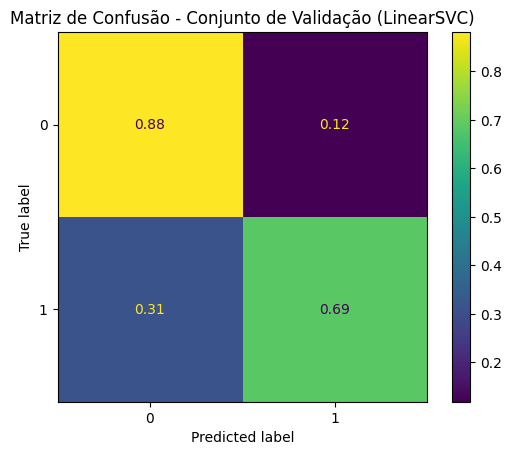

Acurácia - LinearSVC: 79.72689075630252
Relatório de Classificação - LinearSVC:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1086
           1       0.81      0.69      0.74       818

    accuracy                           0.80      1904
   macro avg       0.80      0.78      0.79      1904
weighted avg       0.80      0.80      0.79      1904



In [52]:
from sklearn.svm import LinearSVC

# Treinando o modelo LinearSVC
linear_svc_classifier = LinearSVC()
linear_svc_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de validação
y_pred_val_linear_svc = linear_svc_classifier.predict(X_val)

# Calculando a matriz de confusão
cm_val_linear_svc = confusion_matrix(y_val, y_pred_val_linear_svc, normalize="true")

# Exibindo a matriz de confusão
disp_linear_svc = ConfusionMatrixDisplay(confusion_matrix=cm_val_linear_svc, display_labels=np.unique(y_val))
disp_linear_svc.plot()
plt.title('Matriz de Confusão - Conjunto de Validação (LinearSVC)')
plt.show()

# Calculando a acurácia
acc_linear_svc = linear_svc_classifier.score(X_val, y_val)
print("Acurácia - LinearSVC:", acc_linear_svc*100)

# Obtendo o relatório de classificação
class_report_linear_svc = classification_report(y_val, y_pred_val_linear_svc)

# Exibindo o relatório de classificação para o LinearSVC
print("Relatório de Classificação - LinearSVC:")
print(class_report_linear_svc)


#BernoulliNB

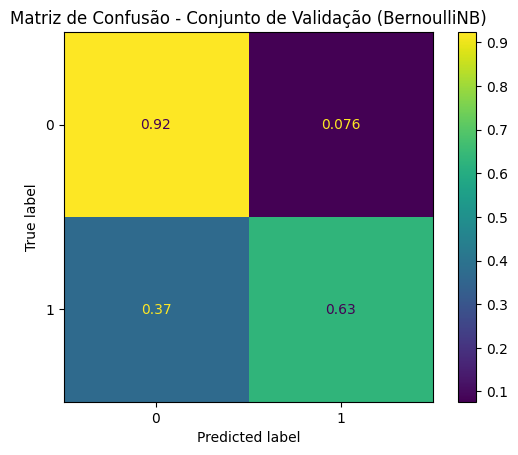

Acurácia - BernoulliNB: 79.83193277310924
Relatório de Classificação - BernoulliNB:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1086
           1       0.86      0.63      0.73       818

    accuracy                           0.80      1904
   macro avg       0.82      0.78      0.78      1904
weighted avg       0.81      0.80      0.79      1904



In [53]:
from sklearn.naive_bayes import BernoulliNB

# Treinando o modelo BernoulliNB
bernoulli_nb_classifier = BernoulliNB()
bernoulli_nb_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de validação
y_pred_val_bernoulli_nb = bernoulli_nb_classifier.predict(X_val)

# Calculando a matriz de confusão
cm_val_bernoulli_nb = confusion_matrix(y_val, y_pred_val_bernoulli_nb, normalize="true")

# Exibindo a matriz de confusão
disp_bernoulli_nb = ConfusionMatrixDisplay(confusion_matrix=cm_val_bernoulli_nb, display_labels=np.unique(y_val))
disp_bernoulli_nb.plot()
plt.title('Matriz de Confusão - Conjunto de Validação (BernoulliNB)')
plt.show()

# Calculando a acurácia
acc_bernoulli_nb = accuracy_score(y_val, y_pred_val_bernoulli_nb)
print("Acurácia - BernoulliNB:", acc_bernoulli_nb*100)

# Obtendo o relatório de classificação
class_report_bernoulli_nb = classification_report(y_val, y_pred_val_bernoulli_nb)

# Exibindo o relatório de classificação para o BernoulliNB
print("Relatório de Classificação - BernoulliNB:")
print(class_report_bernoulli_nb)


#Comparando resultados

In [55]:
import pandas as pd

# Defina as variáveis acc_tree e y_pred_val_tree conforme necessário
acc_tree = decision_tree_classifier.score(X_val, y_val)
y_pred_val_tree = decision_tree_classifier.predict(X_val)

# Resultados dos modelos
results = {
    'Modelo': ['Regressão Logística', 'Árvore de Decisão', 'Classificador Bayesiano', 'LinearSVC', 'BernoulliNB'],
    'Acurácia': [acc*100, acc_tree*100, accuracy_bayesian*100, acc_linear_svc*100, acc_bernoulli_nb*100],
    'Precision': [precision_score(y_val, y_pred_val)*100, precision_score(y_val, y_pred_val_tree)*100, precision_score(y_val, y_pred_val_bayesian)*100, precision_score(y_val, y_pred_val_linear_svc)*100, precision_score(y_val, y_pred_val_bernoulli_nb)*100],
    'Recall': [recall_score(y_val, y_pred_val)*100, recall_score(y_val, y_pred_val_tree)*100, recall_score(y_val, y_pred_val_bayesian)*100, recall_score(y_val, y_pred_val_linear_svc)*100, recall_score(y_val, y_pred_val_bernoulli_nb)*100],
    'F1-Score': [f1_score(y_val, y_pred_val)*100, f1_score(y_val, y_pred_val_tree)*100, f1_score(y_val, y_pred_val_bayesian)*100, f1_score(y_val, y_pred_val_linear_svc)*100, f1_score(y_val, y_pred_val_bernoulli_nb)*100],
    'Support': [None, None, None, None, None]  # Preencha com os valores reais de suporte
}

# Criando o DataFrame
df_results = pd.DataFrame(results)

# Exibindo a tabela
print(df_results)


                    Modelo   Acurácia  Precision     Recall   F1-Score Support
0      Regressão Logística  75.840336  73.986014  64.669927  69.015003    None
1        Árvore de Decisão  75.052521  73.986014  64.669927  69.015003    None
2  Classificador Bayesiano  80.042017  85.096154  64.914425  73.647712    None
3                LinearSVC  79.726891  81.304348  68.581907  74.403183    None
4              BernoulliNB  79.831933  86.166667  63.202934  72.919605    None
